# Prep for batch run

Filters, renames and writes to climate-assessment

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import os.path
from glob import glob
import json

import matplotlib.pyplot as plt
import numpy as np
import scmdata

import pyam
from ndcs.constants import PROCESSED_DATA_DIR, NDC_TARGET_RELEASE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [5]:
CLIMATE_ASSESSMENT = "/home/jared/code/uom/climate-assessment"

<IPython.core.display.Javascript object>

In [6]:
scenarios = scmdata.ScmRun(
    os.path.join(
        PROCESSED_DATA_DIR, "global_emissions", NDC_TARGET_RELEASE, "scenarios.csv"
    )
)

<IPython.core.display.Javascript object>

In [7]:
len(scenarios.get_unique_meta("pathway_id"))

354

<IPython.core.display.Javascript object>

In [8]:
scenarios_to_run = scenarios
len(scenarios_to_run.get_unique_meta("scenario"))

1460

<IPython.core.display.Javascript object>

In [9]:
scenarios_to_run.meta[
    scenarios_to_run.get_meta_columns_except(["variable", "unit"])
].drop_duplicates()

,ambition,conditionality,country_extension,exclude_hot_air,global_extension,model,model_version,pathway_id,region,scenario,stage
0,high,C,SSP1BL,exclude,silicone,NDC Factsheet,12Nov2021a_CR,2013-07-18_1,World,2013-07-18_1__high__C__SSP1BL__exclude,infilled
23,high,C,SSP1BL,exclude,NaN,NDC Factsheet,12Nov2021a_CR,2013-07-18_1,World,2013-07-18_1__high__C__SSP1BL__exclude,NaN
52,high,U,SSP1BL,exclude,silicone,NDC Factsheet,12Nov2021a_CR,2013-07-18_1,World,2013-07-18_1__high__U__SSP1BL__exclude,infilled
75,high,U,SSP1BL,exclude,NaN,NDC Factsheet,12Nov2021a_CR,2013-07-18_1,World,2013-07-18_1__high__U__SSP1BL__exclude,NaN
104,low,C,SSP1BL,exclude,silicone,NDC Factsheet,12Nov2021a_CR,2013-07-18_1,World,2013-07-18_1__low__C__SSP1BL__exclude,infilled
127,low,C,SSP1BL,exclude,NaN,NDC Factsheet,12Nov2021a_CR,2013-07-18_1,World,2013-07-18_1__low__C__SSP1BL__exclude,NaN
156,low,U,SSP1BL,exclude,silicone,NDC Factsheet,12Nov2021a_CR,2013-07-18_1,World,2013-07-18_1__low__U__SSP1BL__exclude,infilled
179,low,U,SSP1BL,exclude,NaN,NDC Factsheet,12Nov2021a_CR,2013-07-18_1,World,2013-07-18_1__low__U__SSP1BL__exclude,NaN
208,high,C,SSP1BL,exclude,silicone,NDC Factsheet,12Nov2021a_CR,2013-07-18_2,World,2013-07-18_2__high__C__SSP1BL__exclude,infilled
231,high,C,SSP1BL,exclude,NaN,NDC Factsheet,12Nov2021a_CR,2013-07-18_2,World,2013-07-18_2__high__C__SSP1BL__exclude,NaN


<IPython.core.display.Javascript object>

# Convert variable names

In [10]:
sorted(scenarios_to_run.get_unique_meta("variable"))

['Emissions|BC',
 'Emissions|C2F6',
 'Emissions|C3F8',
 'Emissions|C4F10',
 'Emissions|C5F12',
 'Emissions|C6F14',
 'Emissions|C7F16',
 'Emissions|C8F18',
 'Emissions|CCl4',
 'Emissions|CF4',
 'Emissions|CFC11',
 'Emissions|CFC113',
 'Emissions|CFC114',
 'Emissions|CFC115',
 'Emissions|CFC12',
 'Emissions|CH2Cl2',
 'Emissions|CH3Br',
 'Emissions|CH3CCl3',
 'Emissions|CH3Cl',
 'Emissions|CH4',
 'Emissions|CHCl3',
 'Emissions|CO',
 'Emissions|CO2|MAGICC AFOLU',
 'Emissions|CO2|MAGICC Fossil and Industrial',
 'Emissions|HCFC141b',
 'Emissions|HCFC142b',
 'Emissions|HCFC22',
 'Emissions|HFC125',
 'Emissions|HFC134a',
 'Emissions|HFC143a',
 'Emissions|HFC152a',
 'Emissions|HFC227ea',
 'Emissions|HFC23',
 'Emissions|HFC236fa',
 'Emissions|HFC245fa',
 'Emissions|HFC32',
 'Emissions|HFC365mfc',
 'Emissions|HFC4310mee',
 'Emissions|Halon1202',
 'Emissions|Halon1211',
 'Emissions|Halon1301',
 'Emissions|Halon2402',
 'Emissions|N2O',
 'Emissions|NF3',
 'Emissions|NH3',
 'Emissions|NOx',
 'Emissio

<IPython.core.display.Javascript object>

In [11]:
PREFIX = "AR6 climate diagnostics|Infilled|"

pfcs = ["C2F6", "C3F8", "C4F10", "C5F12", "C6F14", "C7F16", "C8F18", "CF4", "cC4F8"]

renames = {
    "Emissions|CO2|MAGICC AFOLU": "Emissions|CO2|AFOLU",
    "Emissions|CO2|MAGICC Fossil and Industrial": "Emissions|CO2|Energy and Industrial Processes",
    "Emissions|HFC125": "Emissions|HFC|HFC125",
    "Emissions|HFC134a": "Emissions|HFC|HFC134a",
    "Emissions|HFC143a": "Emissions|HFC|HFC143a",
    "Emissions|HFC152a": "Emissions|HFC|HFC152a",
    "Emissions|HFC227ea": "Emissions|HFC|HFC227ea",
    "Emissions|HFC23": "Emissions|HFC|HFC23",
    "Emissions|HFC236fa": "Emissions|HFC|HFC236fa",
    "Emissions|HFC245ca": "Emissions|HFC|HFC245ca",
    "Emissions|HFC32": "Emissions|HFC|HFC32",
    "Emissions|HFC365mfc": "Emissions|HFC|HFC365mfc",
    "Emissions|HFC4310mee": "Emissions|HFC|HFC43-10",
}
for v in pfcs:
    renames["Emissions|" + v] = "Emissions|PFC|" + v


def update_variable(v):
    if v in renames:
        v = renames[v]
    return PREFIX + v


scenarios_to_run["variable"] = scenarios_to_run["variable"].apply(update_variable)

<IPython.core.display.Javascript object>

In [12]:
scenarios_to_run.get_unique_meta("variable")

['AR6 climate diagnostics|Infilled|Emissions|BC',
 'AR6 climate diagnostics|Infilled|Emissions|CH4',
 'AR6 climate diagnostics|Infilled|Emissions|CO',
 'AR6 climate diagnostics|Infilled|Emissions|CO2|AFOLU',
 'AR6 climate diagnostics|Infilled|Emissions|CO2|Energy and Industrial Processes',
 'AR6 climate diagnostics|Infilled|Emissions|NH3',
 'AR6 climate diagnostics|Infilled|Emissions|NOx',
 'AR6 climate diagnostics|Infilled|Emissions|OC',
 'AR6 climate diagnostics|Infilled|Emissions|Sulfur',
 'AR6 climate diagnostics|Infilled|Emissions|VOC',
 'AR6 climate diagnostics|Infilled|Emissions|PFC|C2F6',
 'AR6 climate diagnostics|Infilled|Emissions|PFC|C6F14',
 'AR6 climate diagnostics|Infilled|Emissions|PFC|CF4',
 'AR6 climate diagnostics|Infilled|Emissions|HFC|HFC125',
 'AR6 climate diagnostics|Infilled|Emissions|HFC|HFC134a',
 'AR6 climate diagnostics|Infilled|Emissions|HFC|HFC143a',
 'AR6 climate diagnostics|Infilled|Emissions|HFC|HFC227ea',
 'AR6 climate diagnostics|Infilled|Emissions|HFC

<IPython.core.display.Javascript object>

In [13]:
scenarios_to_run.head()

time                                                                                                                                                                                                                                                                     2000-01-01  \
ambition conditionality country_extension exclude_hot_air global_extension model         model_version pathway_id   region scenario                               stage    unit        variable                                                                                       
high     C              SSP1BL            exclude         silicone         NDC Factsheet 12Nov2021a_CR 2013-07-18_1 World  2013-07-18_1__high__C__SSP1BL__exclude infilled Mt BC / yr  AR6 climate diagnostics|Infilled|Emissions|BC                                       9.789763   
                                                                                                                                                                           Mt CH4 / yr AR6 climate diagnostics|Infilled|Emissions|CH4                                    358.673730   
                                                                                                                                                                           Mt CO / yr  AR6 climate diagnostics|Infilled|Emissions|CO                                     956.631398   
                                                                                                                                                                           Mt CO2 / yr AR6 climate diagnostics|Infilled|Emissions|CO2|AFOLU                             4300.000000   
                                                                                                                                                                                       AR6 climate diagnostics|Infilled|Emissions|CO2|Energy and Industrial Processes  27464.232260   

time                                                                                                                                                                                                                                                                     2001-01-01  \
ambition conditionality country_extension exclude_hot_air global_extension model         model_version pathway_id   region scenario                               stage    unit        variable                                                                                       
high     C              SSP1BL            exclude         silicone         NDC Factsheet 12Nov2021a_CR 2013-07-18_1 World  2013-07-18_1__high__C__SSP1BL__exclude infilled Mt BC / yr  AR6 climate diagnostics|Infilled|Emissions|BC                                       9.785599   
                                                                                                                                                                           Mt CH4 / yr AR6 climate diagnostics|Infilled|Emissions|CH4                                    360.637616   
                                                                                                                                                                           Mt CO / yr  AR6 climate diagnostics|Infilled|Emissions|CO                                     955.142989   
                                                                                                                                                                           Mt CO2 / yr AR6 climate diagnostics|Infilled|Emissions|CO2|AFOLU                             4100.000000   
                                                                                                                                                                                       AR6 climate diagnostics|Infilled|Emissions|CO2|Energy and Industrial Processes  28010.063761   

time                                                                                        

<IPython.core.display.Javascript object>

In [14]:
ca_data_dir = os.path.join(CLIMATE_ASSESSMENT, "data", "ndcs")
os.makedirs(ca_data_dir, exist_ok=True)

<IPython.core.display.Javascript object>

In [15]:
def dump_scenarios(scenarios_to_write, run_name):
    print(len(scenarios_to_write.get_unique_meta("scenario")))
    scenarios_clean = scenarios_to_write.drop_meta(
        [
            "ambition",
            "conditionality",
            "country_extension",
            "exclude_hot_air",
            "global_extension",
            "stage",
            "pathway_id",
            "model_version",
        ]
    ).filter(year=range(2015, 2101))
    pyam.IamDataFrame(scenarios_clean.timeseries(time_axis="year")).to_csv(
        os.path.join(ca_data_dir, f"{NDC_TARGET_RELEASE}_scenarios_{run_name}.csv")
    )

<IPython.core.display.Javascript object>

In [16]:
dump_scenarios(
    scenarios_to_run.filter(exclude_hot_air="exclude", country_extension="SSP1BL"),
    "complete",
)

1418


<IPython.core.display.Javascript object>

## sensitivity checks

In [17]:
meta_fnames = sorted(
    glob(
        os.path.join(
            PROCESSED_DATA_DIR,
            "global_emissions_meta",
            NDC_TARGET_RELEASE,
            "low",
            "C",
            "*",
            "SSP1BL",
            "selected_countries.json",
        )
    )
)

last_countries = []
for f in meta_fnames:
    with open(f) as fh:
        data = json.load(fh)
    last_countries.append(
        {"pathway_id": data["pathway_id"], "last_country": data["last_country"]}
    )
last_countries = pd.DataFrame(last_countries)
last_countries.iloc[-30:]

,pathway_id,last_country
324,2021-10-10_1,PSE
325,2021-10-10_2,TUN
326,2021-10-11_1,BLR
327,2021-10-11_2,CMR
328,2021-10-11_3,MLI
329,2021-10-12_1,ALB
330,2021-10-12_10,UGA
331,2021-10-12_2,BEN
332,2021-10-12_3,GNB
333,2021-10-12_4,JOR


<IPython.core.display.Javascript object>

In [18]:
last_countries[last_countries.last_country == "IND"]

,pathway_id,last_country
77,2016-10-02_1,IND
351,2021-11-01_1,IND


<IPython.core.display.Javascript object>

In [19]:
pathway_ids = sorted(scenarios_to_run.get_unique_meta("pathway_id"))

<IPython.core.display.Javascript object>

In [20]:
most_recent_pathway = pathway_ids[-1]
most_recent_pathway

'2021-11-09_1'

<IPython.core.display.Javascript object>

In [21]:
target_pathways = [
    #     "2021-10-18_1",
    #     "2021-10-28_1",
    #     "2021-10-28_2",
    #     "2021-10-30-1",
    #     "2021-11-01_1",
    most_recent_pathway,
]

<IPython.core.display.Javascript object>

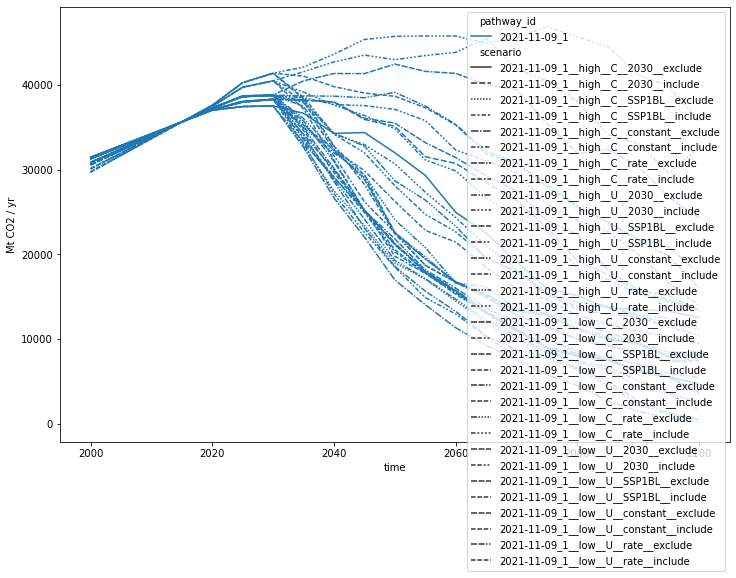

<IPython.core.display.Javascript object>

In [22]:
scenarios_to_run.filter(
    pathway_id=target_pathways,
    conditionality=["C", "U"],
    variable="AR6 climate diagnostics|Infilled|Emissions|CO2|Energy and Industrial Processes",
).line_plot(hue="pathway_id", style="scenario")

In [23]:
dump_scenarios(
    scenarios_to_run.filter(pathway_id=target_pathways, conditionality=["C", "U"]),
    "sensitivity",
)

32


<IPython.core.display.Javascript object>

In [24]:
scenarios_to_run.filter(pathway_id=target_pathways).get_unique_meta("scenario")

['2021-11-09_1__high__C__2030__exclude',
 '2021-11-09_1__high__C__2030__include',
 '2021-11-09_1__high__C__SSP1BL__exclude',
 '2021-11-09_1__high__C__SSP1BL__include',
 '2021-11-09_1__high__C__constant__exclude',
 '2021-11-09_1__high__C__constant__include',
 '2021-11-09_1__high__C__rate__exclude',
 '2021-11-09_1__high__C__rate__include',
 '2021-11-09_1__high__R__2030__exclude',
 '2021-11-09_1__high__R__2030__include',
 '2021-11-09_1__high__R__SSP1BL__exclude',
 '2021-11-09_1__high__R__SSP1BL__include',
 '2021-11-09_1__high__R__constant__exclude',
 '2021-11-09_1__high__R__constant__include',
 '2021-11-09_1__high__R__rate__exclude',
 '2021-11-09_1__high__R__rate__include',
 '2021-11-09_1__high__U__2030__exclude',
 '2021-11-09_1__high__U__2030__include',
 '2021-11-09_1__high__U__SSP1BL__exclude',
 '2021-11-09_1__high__U__SSP1BL__include',
 '2021-11-09_1__high__U__constant__exclude',
 '2021-11-09_1__high__U__constant__include',
 '2021-11-09_1__high__U__rate__exclude',
 '2021-11-09_1__high_

<IPython.core.display.Javascript object>

In [25]:
for g in scenarios.filter(pathway_id=target_pathways).groupby("scenario"):
    g.drop_meta(["stage", "global_extension"]).to_csv(
        os.path.join(
            PROCESSED_DATA_DIR,
            "global_emissions",
            NDC_TARGET_RELEASE,
            "{}.csv".format(g.get_unique_meta("scenario", True)),
        )
    )

<IPython.core.display.Javascript object>

# Extra Methane pledge scenarios

Assume triangular shapes from 2020 (=0) to 2030 (=max) to 2040 (=0)

In [26]:
target_scenario_name = "2021-11-03_1__high__C__SSP1BL__exclude"


<IPython.core.display.Javascript object>

In [27]:
pledges = {"fullCH4": -90, "unconditionalCH4": -56.7, "conditionalCH4": -37.1}

<IPython.core.display.Javascript object>

In [28]:
def create_updated_methane(emissions, pledge):
    assert (
        emissions.get_unique_meta("variable", True)
        == "AR6 climate diagnostics|Infilled|Emissions|CH4"
    )
    ts = emissions.timeseries(time_axis="year")

    for year in range(2020, 2100 + 1):
        if year <= 2030:
            delta_ch4 = (year - 2020) * pledge / 10
            ts.loc[:, year] = ts.loc[:, year] + delta_ch4
        else:
            val_2030 = ts.loc[:, 2030].squeeze()
            ts.loc[:, year] = min(ts.loc[:, year].squeeze(), val_2030)
    return scmdata.ScmRun(ts)


def create_updated_scenario(scenario_name, pledge_name):
    target_scenario = scenarios.filter(scenario=scenario_name)

    updated_scenario = scmdata.run_append(
        [
            target_scenario.filter(variable="*|Emissions|CH4", keep=False),
            create_updated_methane(
                target_scenario.filter(variable="*|Emissions|CH4"),
                pledge=pledges[pledge_name],
            ),
        ]
    )
    updated_scenario["scenario"] = scenario_name + "__" + pledge_name

    return updated_scenario

<IPython.core.display.Javascript object>

In [29]:
updated_scenarios = scmdata.run_append(
    [create_updated_scenario(target_scenario_name, pledge) for pledge in pledges]
)
updated_scenarios.get_unique_meta("scenario")

['2021-11-03_1__high__C__SSP1BL__exclude__fullCH4',
 '2021-11-03_1__high__C__SSP1BL__exclude__unconditionalCH4',
 '2021-11-03_1__high__C__SSP1BL__exclude__conditionalCH4']

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='Mt CH4 / yr'>

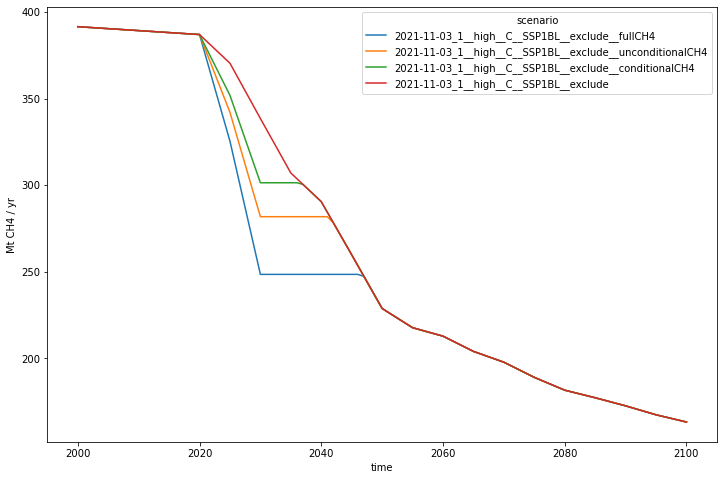

<IPython.core.display.Javascript object>

In [30]:
scmdata.run_append(
    [updated_scenarios, scenarios.filter(scenario=target_scenario_name)]
).filter(variable="*|Emissions|CH4").lineplot()

In [31]:
dump_scenarios(updated_scenarios, "methanePledges")

3


<IPython.core.display.Javascript object>